# Course Schedule

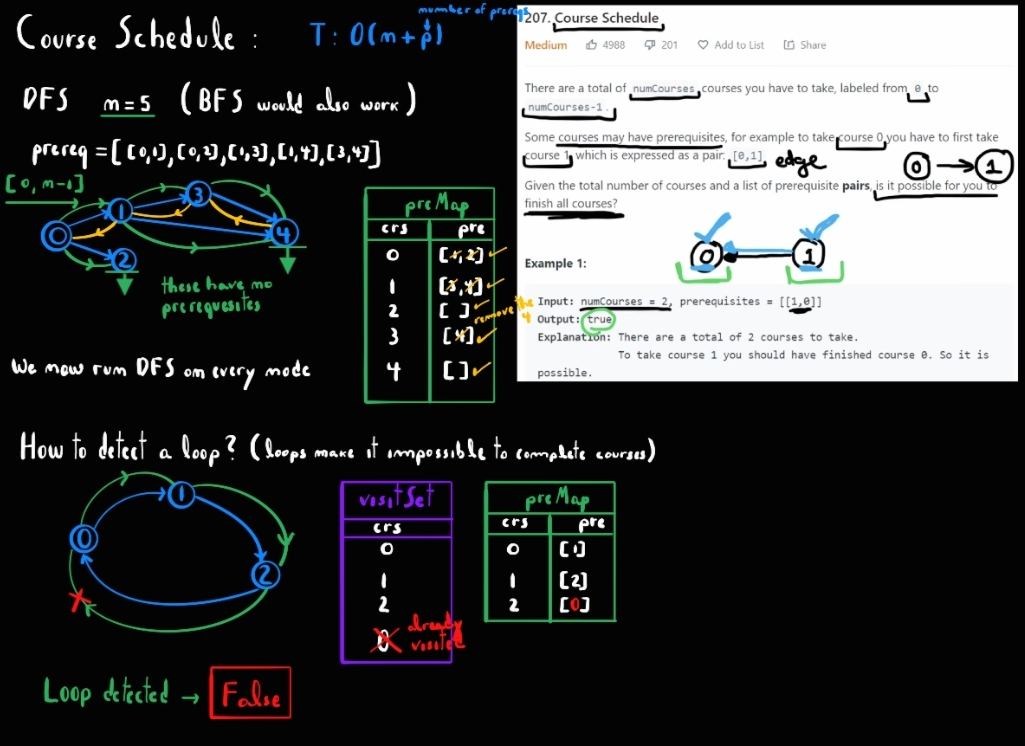

In [ ]:
from typing import List


class Solution:
    def can_finish(self, num_courses: int, prereqs: List[List[int]]) -> bool:
        # creates empty prereq map
        prereq_map = {i: [] for i in range(num_courses)}
        # fills it
        for crs, prereq in prereqs:
            prereq_map[crs].append(prereq)
        # visit set to store all courses along the DFS path
        vis_set = set()

        def dfs(crs):
            # base case 1 (detected loop):
            if crs in vis_set:
                return False
            # base case 2 (no prereqs, we can complete the course):
            if prereq_map[crs] == []:
                return True
            # if neither above happens, we add the crs to visited
            vis_set.add(crs)
            for prereq in prereq_map[crs]:
                # all it takes is one prereq to return False for us to return False
                if not dfs(prereq):
                    return False
            # we remove the course from visited before returning True
            # because we are done visiting it
            vis_set.remove(crs)
            # also, because we know the course can be visited we set its
            # prerequirements to an empty list to signal that, as we've
            # shown in the diagram
            prereq_map[crs] = []
            return True

        # we have to run dfs for every node because some graphs might not
        # be fully connected graphs ie. 1 -> 2; 3 -> 4
        for crs in range(num_courses):
            if not dfs(crs):
                return False
        return True


sol = Solution()
sol.can_finish(2, [[1, 0]])

# Number of Islands

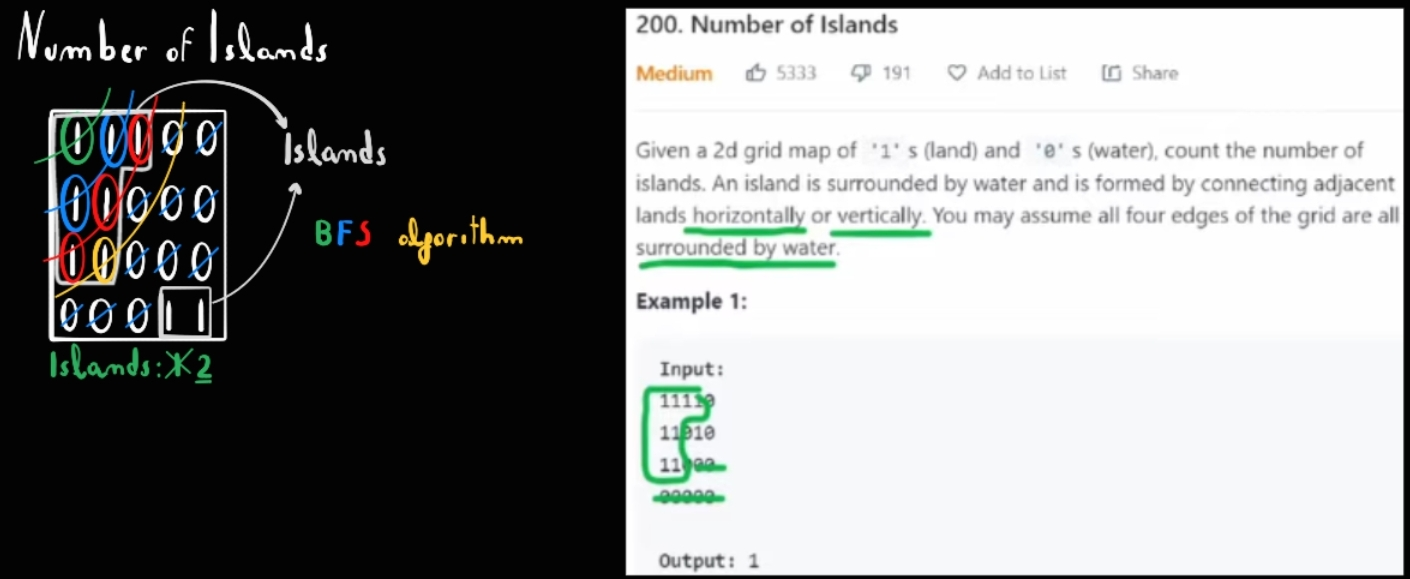

In [ ]:
from typing import List
from collections import deque


class Solution:
    

In [4]:
from typing import List
from collections import deque


class Solution:
    def num_islands(self, grid: List[List[str]]) -> int:
        if not grid:
            return 0
        visited = set()
        islands = 0
        rows, cols = len(grid), len(grid[0])

        def bfs(r, c):
            q = deque()
            visited.add((r, c))
            q.append((r, c))
            while q:
                row, col = q.pop()
                directions = [[-1, 0], [1, 0], [0, -1], [0, 1]]
                for dr, dc in directions:
                    r, c = row + dr, col + dc
                    if (
                        r in range(rows)
                        and c in range(cols)
                        and (r, c) not in visited
                        and grid[r][c] == "1"
                    ):
                        q.append((r, c))
                        visited.add((r, c))
            return

        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == "1" and (r, c) not in visited:
                    visited.add((r, c))
                    bfs(r, c)
                    islands += 1
        return islands

    def num_islands_sol(self, grid: List[List[str]]) -> int:
        # input validation
        if not grid:
            return 0
        # get the dimensions of the grid
        rows, cols = len(grid), len(grid[0])
        # to keep track of visited positions
        visited = set()
        # initialize the number of islands to 0
        n_islands = 0

        # bfs is NOT a recursive algorithm, it is iterative
        # so we need a data structure to use for memory, ie
        # a queue is normally used
        def bfs(r, c):
            q = deque()
            # mark the position as visited
            visited.add((r, c))
            # add it to the queue
            q.append((r, c))
            # while our queue is not empty we'll be
            # expanding our island
            while q:
                # fun note: if we use pop() rather than leftpop()
                # we would have a iterative (not recursive) dfs solution!
                row, col = q.popleft()
                # we want to check the adjancent positions
                # to the position we just checked as well
                directions = [[-1, 0], [0, -1], [1, 0], [0, 1]]
                for dr, dc in directions:
                    r, c = row + dr, col + dc
                    # check if in bounds
                    if (
                        r in range(rows)
                        and c in range(cols)
                        and
                        # check it's land
                        grid[r][c] == "1"
                        and
                        # and check not yet visited
                        (r, c) not in visited
                    ):
                        # then we append to our queue
                        # because we need to run bfs
                        # in this cell as well
                        q.append((r, c))
                        # and we need to mark it as
                        # visited so we don't visit it
                        # again
                        visited.add((r, c))
            return

        # we want to visit every single position in the grid
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == "1" and (r, c) not in visited:
                    # we have to run our 'traversal'
                    # ie bfs in this case
                    bfs(r, c)
                    # increment the number of islands
                    n_islands += 1
        return n_islands


sol = Solution()
sol.num_islands([["1", "1", "1"], ["1", "1", "0"], ["0", "0", "1"]])

2